In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question -1
**Download the Iris dataset from the link here. Load the dataset into python using
appropriate library function. Then perform the following visualization using appropriate
labels of figures, sub-figures and axes:
i. Create box plot of each column in a single figure.
ii. Create pairwise scatter plot of each column. Colour the plots according to the
species.
iii. Create histogram of each .**
olumn.

In [2]:
iris_dataset = pd.read_csv("iris.csv")

In [3]:
iris_dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
new_data = iris_dataset[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
print(new_data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [5]:
new_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

# Boxplot

<Figure size 1000x700 with 0 Axes>

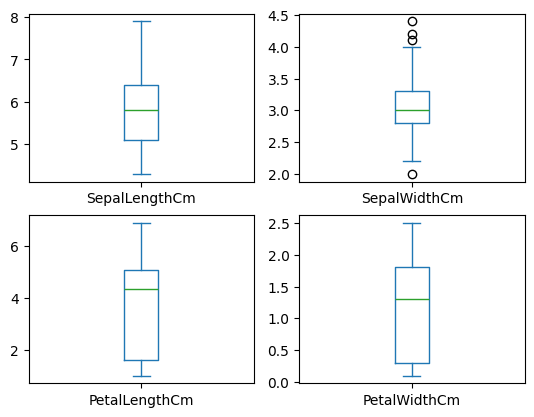

In [6]:
plt.figure(figsize=(10,7))
new_data.plot(kind ="box",subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

# Pairwise Scatter Plot

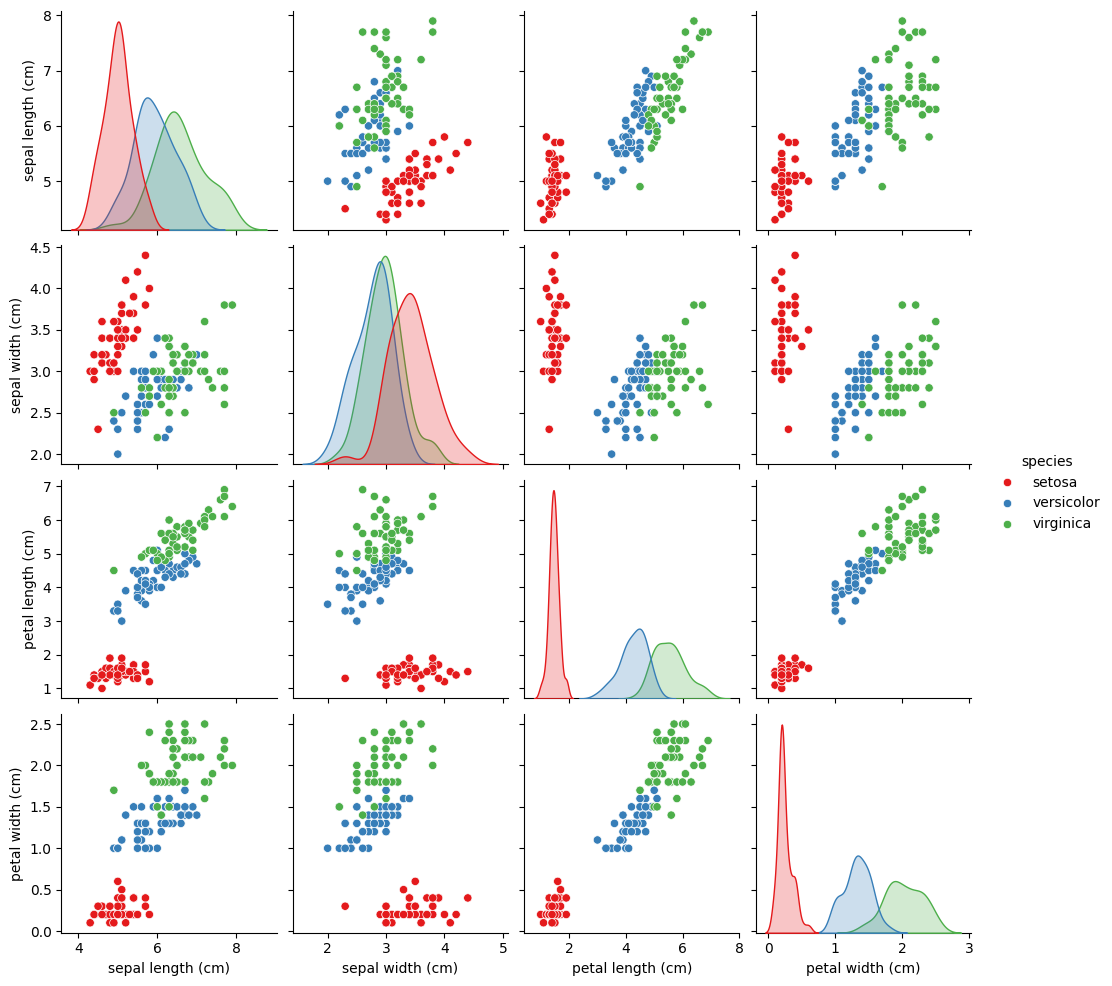

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
new_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species column
new_data['species'] = iris.target
new_data['species'] = new_data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Create the pairplot
sns.pairplot(data=new_data, hue='species', palette='Set1', height=2.5)
plt.show()



# histogram

IndexError: index 2 is out of bounds for axis 0 with size 2

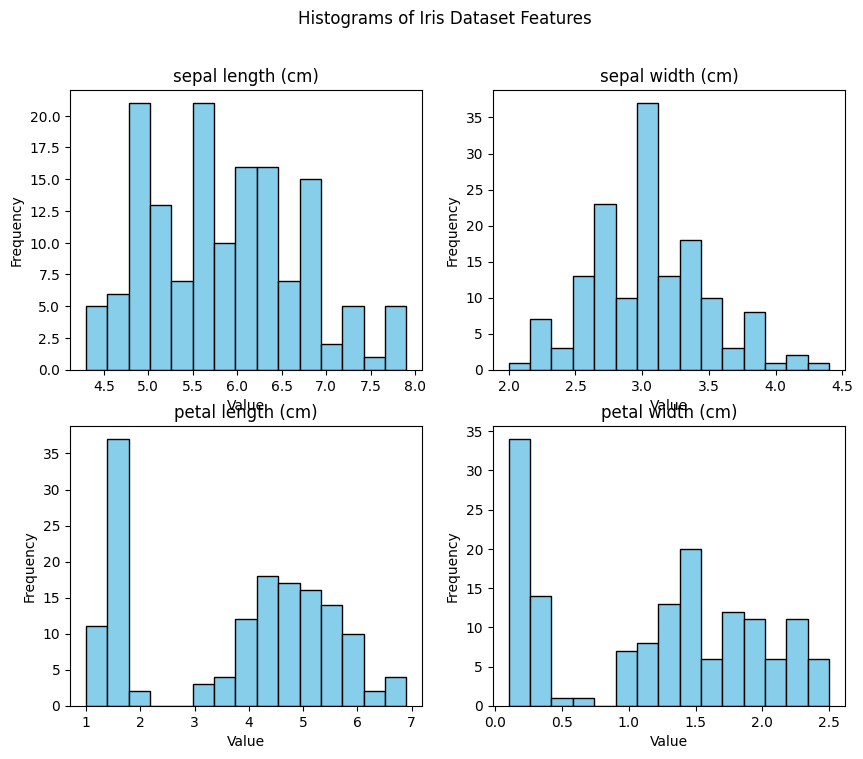

In [20]:
# Set up the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Histograms of Iris Dataset Features")


# Iterate over each column and axis to create histograms
for i, column in enumerate(new_data.columns):
    row, col = divmod(i, 2)  # Determine the subplot position
    axes[row, col].hist(new_data[column], bins=15, color='skyblue', edgecolor='black')
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Question -2
* On the dataset of the previous question (the iris data) perform the describe (library
function provided by pandas) function. Now write your own describe function called
my describe, which will take a data frame as input summarize t.

In [13]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
def my_describe(iris_dataset):
    summary={}
    summary["count"]=iris_dataset.count()
    summary["mean"]=iris_dataset.mean(numeric_only=True)
    summary["min"]=iris_dataset.min()
    summary["std"]=iris_dataset.std(numeric_only=True)
    summary["max"]=iris_dataset.max()
    summary["25%"]=iris_dataset.quantile(0.25,numeric_only=True)
    summary["50%"]=iris_dataset.median(numeric_only=True)
    summary["75"]=iris_dataset.quantile(0.75,numeric_only=True)
    return pd.DataFrame(summary)

In [15]:
iris_describe = my_describe(iris_dataset)
print(iris_describe)

               count       mean          min        std             max  \
Id               150  75.500000            1  43.445368             150   
PetalLengthCm    150   3.758667          1.0   1.764420             6.9   
PetalWidthCm     150   1.198667          0.1   0.763161             2.5   
SepalLengthCm    150   5.843333          4.3   0.828066             7.9   
SepalWidthCm     150   3.054000          2.0   0.433594             4.4   
Species          150        NaN  Iris-setosa        NaN  Iris-virginica   

                 25%    50%      75  
Id             38.25  75.50  112.75  
PetalLengthCm   1.60   4.35    5.10  
PetalWidthCm    0.30   1.30    1.80  
SepalLengthCm   5.10   5.80    6.40  
SepalWidthCm    2.80   3.00    3.30  
Species          NaN    NaN     NaN  


# Question -3
Randomly generate a 4 × 4 numpy array of integers. Now create your own Min-Max
normalization function to perform on the array, first by considering each column representation data and second by considering each row representing data.

# Min-Max normalization

In [29]:
A = iris_dataset.drop(["Id","Species"],axis=1).values

In [30]:
def min_max_normalization(A):
    x_max=np.max(A,axis=0)
    x_min=np.min(A,axis=0)
    normalization=(A-x_min)/(x_max-x_min)
    return normalization

In [31]:
AB = min_max_normalization(A)

In [32]:
AB

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset.drop(["Species"],axis=1),iris_dataset["Species"],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((105, 5), (45, 5))

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [37]:
np.round(X_train.describe(),1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.0,105.0,105.0,105.0,105.0
mean,78.0,5.9,3.0,3.8,1.2
std,44.7,0.9,0.4,1.8,0.8
min,1.0,4.3,2.0,1.1,0.1
25%,39.0,5.1,2.8,1.6,0.3
50%,80.0,5.8,3.0,4.4,1.3
75%,117.0,6.5,3.3,5.2,1.9
max,150.0,7.9,4.4,6.9,2.5


In [38]:
np.round(X_train_scaled.describe(),1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.0,105.0,105.0,105.0,105.0
mean,0.5,0.4,0.4,0.5,0.5
std,0.3,0.2,0.2,0.3,0.3
min,0.0,0.0,0.0,0.0,0.0
25%,0.3,0.2,0.3,0.1,0.1
50%,0.5,0.4,0.4,0.6,0.5
75%,0.8,0.6,0.5,0.7,0.8
max,1.0,1.0,1.0,1.0,1.0


# Z-score normalization
Randomly generate a 4 × 4 numpy array of integers. Now create your own Z-score
normalization function to perform on the array, first by considering each column representation data and second by considering each row representing data.

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
A = iris_dataset.drop(["Id","Species"],axis=1).values

In [41]:
scaler1=StandardScaler()

In [42]:
iris_dataset_standardscaler=scaler.fit_transform(A)

In [43]:
iris_dataset_standardscaler

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [45]:
def standardscaler(A):
    mean=np.mean(A,axis=0)
    standard_deviation=np.std(A,axis=0)
    std=(A-mean)/(standard_deviation)
    return std

In [46]:
irs_standardscaler=standardscaler(A)

In [47]:
irs_standardscaler

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Question -5

In [61]:
dataset2 = pd.read_csv("Arpita Saha - classification.csv")


In [62]:
dataset2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [63]:
dataset2.shape

(569, 33)

In [64]:
dataset2.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [65]:
dataset2.drop(columns = ["id","Unnamed: 32"],inplace=True)

In [69]:
dataset2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [70]:
dataset2.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

# Ques - 5(a)
Classify the dataset using KNN algorithm. Use appropriate library function for the
same.

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset2.iloc[:,1:],dataset2.iloc[:,0],test_size=0.2,random_state=2)

In [72]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.1241,0.22640,0.1326,0.10480,0.2250,0.08321
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.3865,0.17080,0.3193,0.09221
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.4646,0.20130,0.4432,0.10860
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.1909,0.26980,0.4023,0.14240,0.2964,0.09606


In [73]:
X_train.shape

(455, 30)

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [75]:
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
X_train

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [77]:
X_train.shape

(455, 30)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)


In [79]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
y_pred = KNN.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred)

0.9912280701754386

In [83]:
score = []

for i in range(1,16):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))
    

In [84]:
score

[0.956140350877193,
 0.9736842105263158,
 0.9912280701754386,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544]

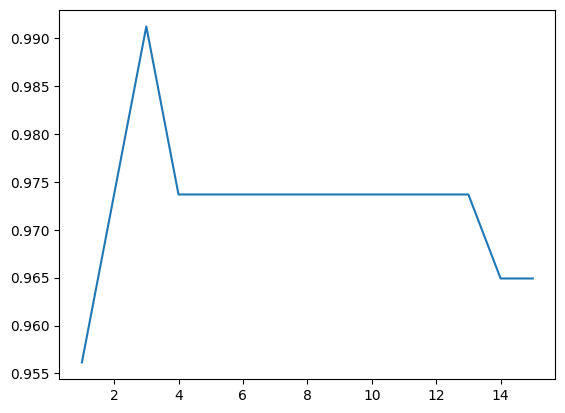

In [85]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),score)

# Question -6
Use the following code to generate a dataset. Perform KMeans, agglomerative hierarchical
clustering algorithm on the data.

In [92]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [93]:
data, _ = make_blobs(n_samples=2000, centers=10, cluster_std=1)

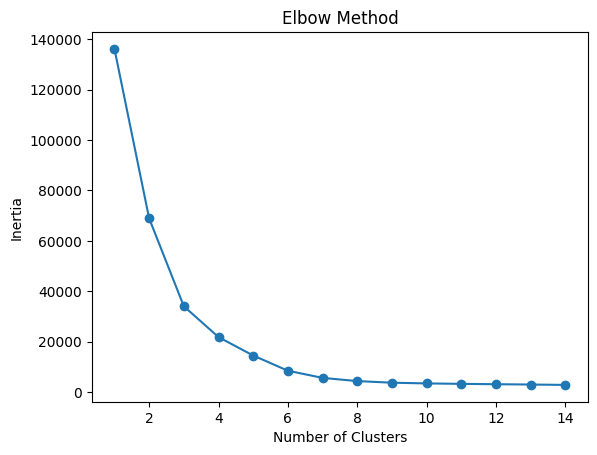

In [90]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
data, _ = make_blobs(n_samples=2000, centers=10, cluster_std=1, random_state=42)

# Calculate inertia for different numbers of clusters
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the inertia to find the elbow point
plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


C:\Users\sahaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


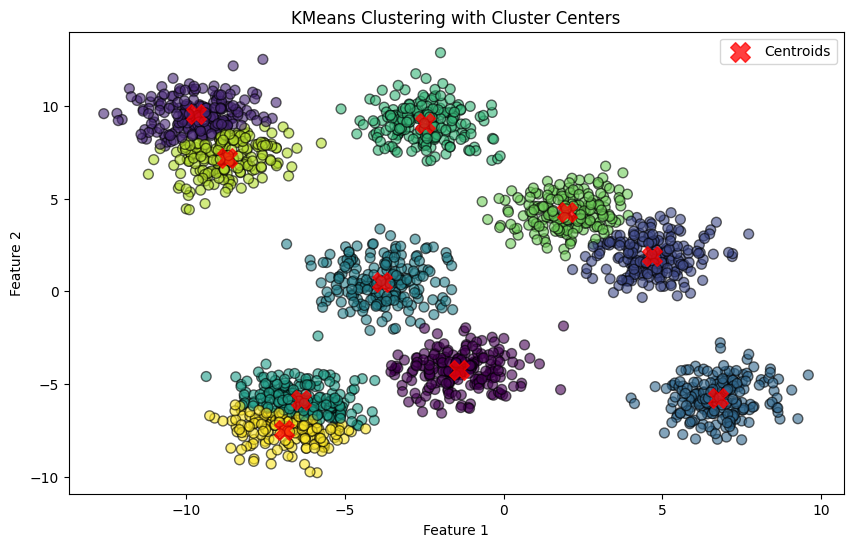

In [94]:


# Generate synthetic data
n_samples = 2000
centers = 10
cluster_std = 1
data, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

# Determine the optimal number of clusters (assuming you have already done this and found optimal_k = 10)
optimal_k = 10

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data)

# Plot the clusters
plt.figure(figsize=(10, 6))

# Plot data points colored by cluster
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis', alpha=0.6, edgecolor='k')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title('KMeans Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# Question -7

In [95]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [96]:
n_samples = 1000
noise = 0.1
data,_ = make_moons (n_samples= n_samples , noise=noise , random_state=0)

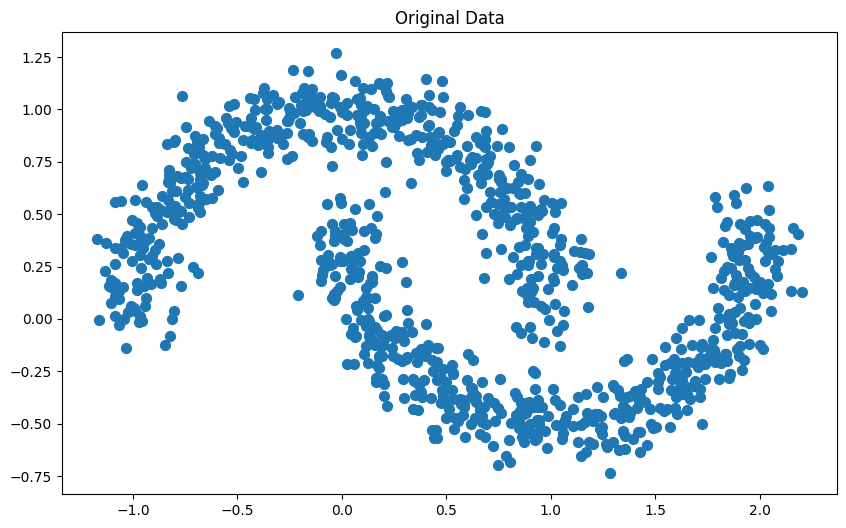

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.title('Original Data')
plt.show()

In [98]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(data)

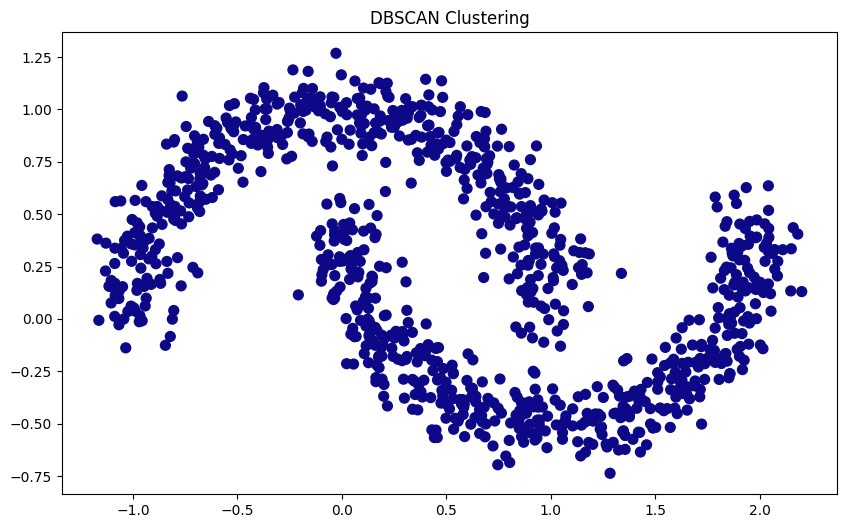

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.show()

# Question -8

In [100]:
from sklearn.cluster import AgglomerativeClustering

In [102]:
data, _ = make_blobs(n_samples=2000, centers=5, cluster_std=2.5)

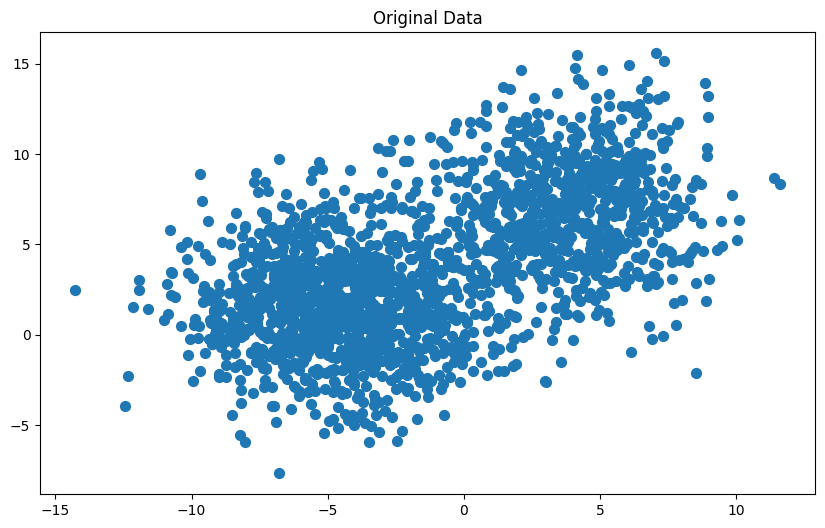

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.title('Original Data')
plt.show()

In [104]:
agglo = AgglomerativeClustering(n_clusters=5)
clusters = agglo.fit_predict(data)

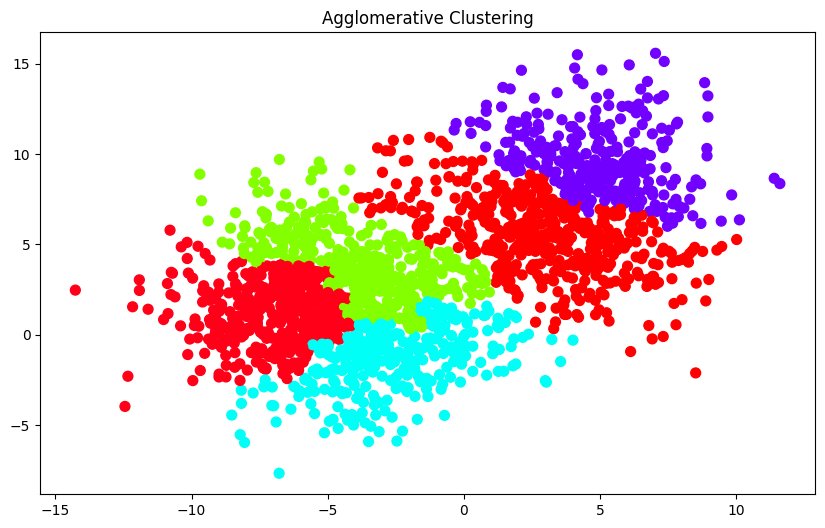

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='hsv')
plt.title('Agglomerative Clustering')
plt.show()